# 📊 Data Analysis Overview

Welcome to the **Data Analysis** section of the **xGenius — Machine Learning for Soccer Player Performance Prediction** project.

This file provides a clear, step-by-step exploration of the dataset before building any machine learning models. The goal is to understand the structure, quality, and relationships inside the data so we can create effective features and accurate predictions later.

---
# Data Analysis with Plotly

In this notebook, we perform **initial data exploration** to understand the dataset and identify potential issues such as missing values, duplicates, or outliers.  

For **more interactive and in-depth analysis**, we use **[Plotly](https://plotly.com/python/)** — a powerful library for creating interactive visualizations such as:

- Histograms and boxplots to explore distributions and outliers  
- Scatter plots to examine relationships between numeric features  
- Correlation heatmaps with zoom and hover functionality  

> ⚠ Note: This interactive analysis was specially prepared for the **xGenius-Machine-Learning-for-Soccer-Player-Performance-Prediction project**., you can explore the dataset on our Plotly Studio app: [ed29291b-7e57-49b1-bfb9-409764f1bd4d.plotly.app](https://ed29291b-7e57-49b1-bfb9-409764f1bd4d.plotly.app)

**References:**  
- Plotly official documentation: [https://plotly.com/python/](https://plotly.com/python/)  
- Plotly Express tutorials: [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/)


## 🔍 Why This Analysis Matters
Before training models, we must answer questions like:
- What features do we have?
- Are there missing values or outliers?
- How do performance metrics (xG, goals, assists, etc.) relate to each other?
- How do league and position differences affect player stats?
- Does salary correlate with player performance?

This analysis helps us:
1. **Understand the dataset deeply**
2. **Choose useful features for modeling**
3. **Prepare high-quality inputs for prediction**
4. **Explain insights clearly in our final report**

---

## 🧭 What Happens After This?
After completing data analysis, the next project steps will be:

1. **Feature Engineering**  
   Creating new metrics such as *gpg, xGdiff, league_ratio*, etc.  
   → See: [`src/`](../src/)

2. **Model Training**  
   Predicting **xGg** and **aGg** using machine learning models.  
   → Models stored in: [`models/`](../models/)

3. **Results & Evaluation**  
   Generating tables, plots, and insights.  
   → Outputs saved in: [`results/`](../results/)

4. **Final Report**  
   Summaries, visualizations, and conclusions.  
   → See: [`reports/`](../reports/)

---

## 📁 Related Project Structure
- [`Data/`](../Data/) — Raw dataset files  
- [`Notebooks/`](../Notebooks/) — Jupyter notebooks for analysis  
- [`src/`](../src/) — Source code for feature engineering and modeling  
- [`models/`](../models/) — Trained ML models  
- [`results/`](../results/) — Tables, plots, metrics  
- [`reports/`](../reports/) — Final research reports  
- [`requirements.txt`](../requirements.txt) — Python dependencies  

---

## ✔️ Let's Begin
In the following sections, we will:
- Load the dataset  
- Explore statistical summaries  
- Visualize feature distributions  
- Compute correlations  
- Identify important patterns  

This will give us a strong foundation before moving to the modeling stage.


# Load the dataset

> **Log:** We use this log file to record every important step and message during data analysis, so it is easier to track progress, debug issues, and review results later.


In [3]:
import sys
# Add src folder to path
sys.path.append(r"C:\Users\davro\OneDrive\Desktop\xGenius-Machine-Learning-for-Soccer-Player-Performance-Prediction\src")

from logger_setup import Logger
from dl_01_data_loader import DataLoader

# Setup logger
log_file = r"C:\Users\davro\OneDrive\Desktop\xGenius-Machine-Learning-for-Soccer-Player-Performance-Prediction\logs\01_data_analysis.log"
logger = Logger(log_file)

logger.info("Starting dataset loading...")

# Load dataset
loader = DataLoader(r"C:\Users\davro\OneDrive\Desktop\git_project\Data\Raw_Data")

try:
    full_df = loader.load_datasets()
    logger.info("Dataset successfully loaded using DataLoader class.")
except Exception as e:
    logger.error(f"Error occurred while loading dataset: {e}")


In [ ]:
#Save marged dataset for later use
df.to_csv(r"C:\Users\davro\OneDrive\Desktop\xGenius-Machine-Learning-for-Soccer-Player-Performance-Prediction\Data\merged\df_merged.csv",index=False)

In [10]:
# For convenience, use 'df' instead of 'full_df'
df = full_df


# Basic Dataset Info

In [13]:
# Shape of the dataset
print(f"Dataset shape: {df.shape}")
# Column names
print("Columns:", df.columns.tolist())
# Info about each column (types, null values)
df.info()

Dataset shape: (20926, 21)
Columns: ['id', 'player_name', 'games', 'time', 'goals', 'xG', 'assists', 'xA', 'shots', 'key_passes', 'yellow_cards', 'red_cards', 'position', 'team_title', 'npg', 'npxG', 'xGChain', 'xGBuildup', 'league', 'season', 'Size']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20926 entries, 0 to 20925
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20926 non-null  int64  
 1   player_name   20926 non-null  object 
 2   games         20926 non-null  int64  
 3   time          20926 non-null  int64  
 4   goals         20926 non-null  int64  
 5   xG            20926 non-null  float64
 6   assists       20926 non-null  int64  
 7   xA            20926 non-null  float64
 8   shots         20926 non-null  int64  
 9   key_passes    20926 non-null  int64  
 10  yellow_cards  20926 non-null  int64  
 11  red_cards     20926 non-null  int64  
 12  position      20926 non-null  ob

In [14]:
# Drop unexpectedly included column 'Size' which has almost no data
df = df.drop(columns=['Size'])


In [15]:
# Use df.head() for being more familar with data content
df.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup,league,season
0,1513,Mauro Icardi,36,2897,22,20.040535,6,4.607650,121,34,4,0,F S,Inter,18,16.234041,23.242989,4.910617,ASerie,1415
1,1955,Luca Toni,38,3228,22,21.204769,2,2.914252,125,27,3,0,F S,Verona,18,16.636976,18.810562,3.106042,ASerie,1415
2,3848,Carlos Tévez,32,2594,20,13.372144,7,5.016580,114,61,6,0,F M S,Juventus,18,10.327029,20.007632,8.907537,ASerie,1415
3,1293,Gonzalo Higuaín,37,2786,18,21.097412,7,4.082174,113,49,5,0,F S,Napoli,15,15.768320,22.711577,4.917353,ASerie,1415
4,2014,Jérémy Menez,33,2713,16,10.936869,4,4.379692,78,46,3,1,F M S,AC Milan,8,4.846598,13.755916,6.889687,ASerie,1415


In [16]:
# Count missing values per column
missing = df.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [17]:
# Duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [20]:
# Identify categorical columns for later use and analysis
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)



Categorical columns: ['player_name', 'position', 'team_title', 'league', 'season']


In [22]:
# Numeric columns for later use and analysis
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", num_cols)



Numeric columns: ['id', 'games', 'time', 'goals', 'xG', 'assists', 'xA', 'shots', 'key_passes', 'yellow_cards', 'red_cards', 'npg', 'npxG', 'xGChain', 'xGBuildup']


# Visualization(Analysis using matplotlib, seaborn and plotly express to more information)

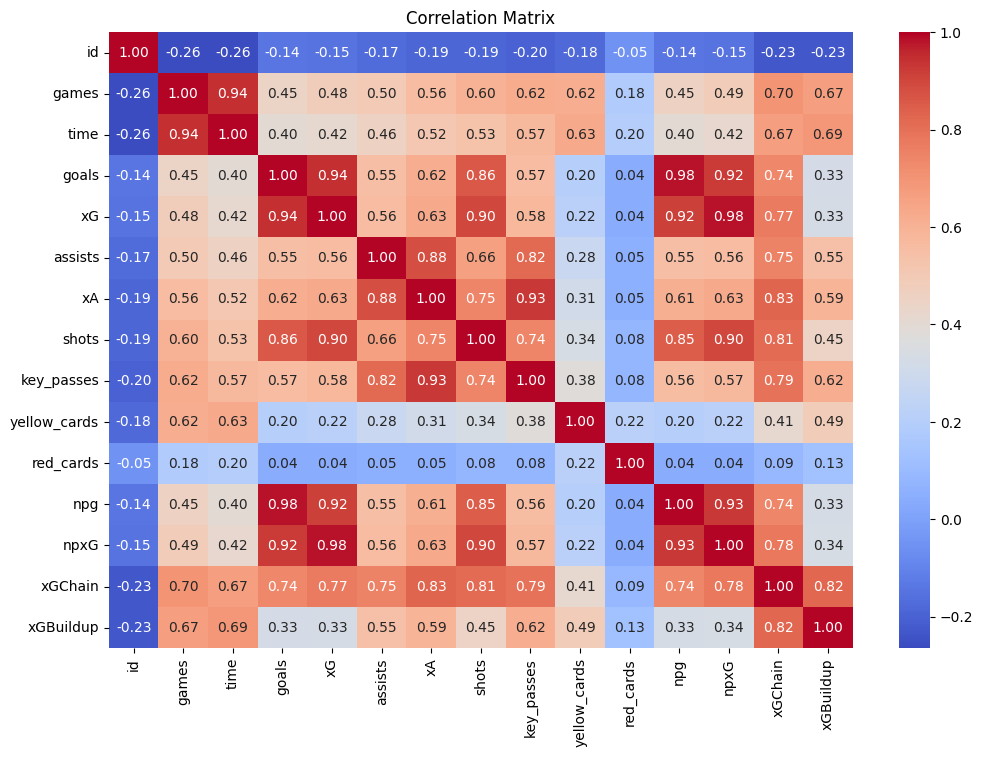

In [ ]:
#Correlation analysis(Helps identify highly correlated features for feature selection and  guide which features to engineer.)
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


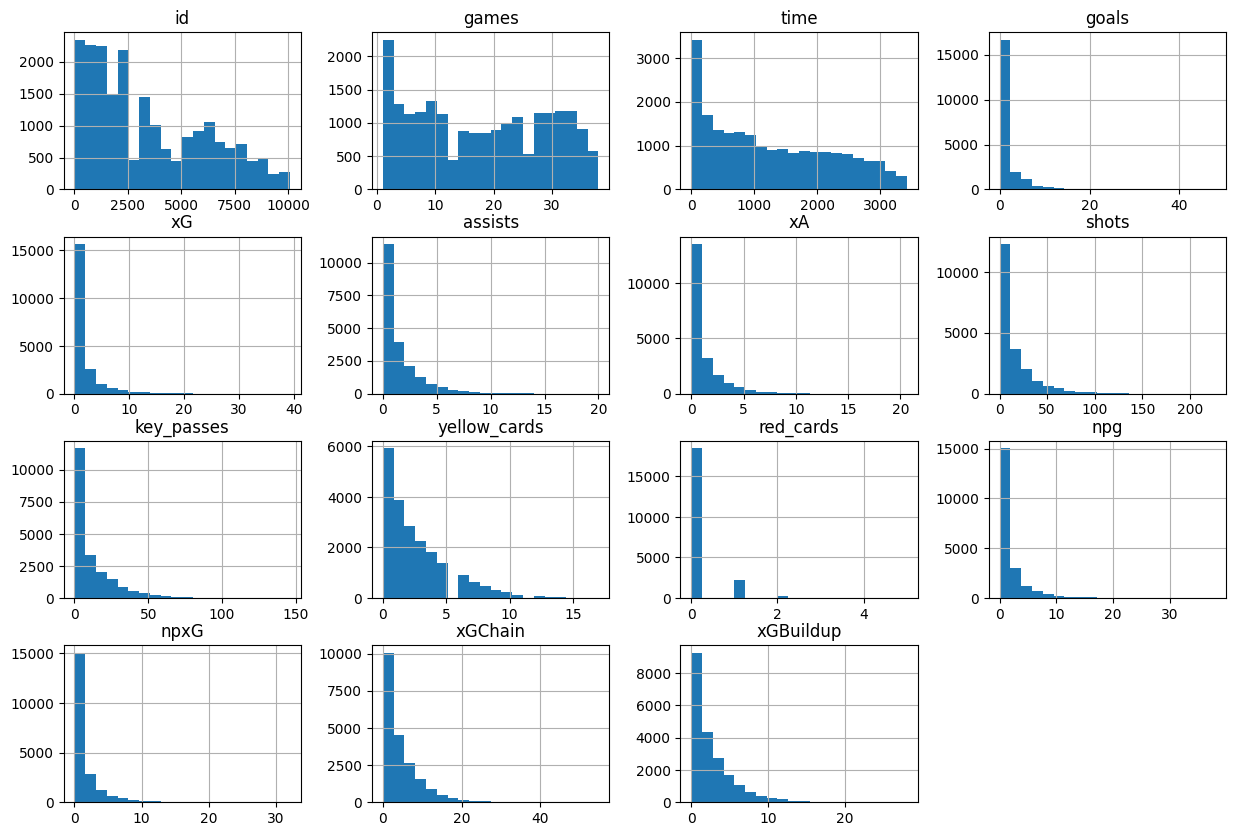

In [24]:
#Distribution Plots(Check if numeric features are skewed or normally distributed and helps decide normalization/standardization later.)
# Histograms for numeric columns
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.show()


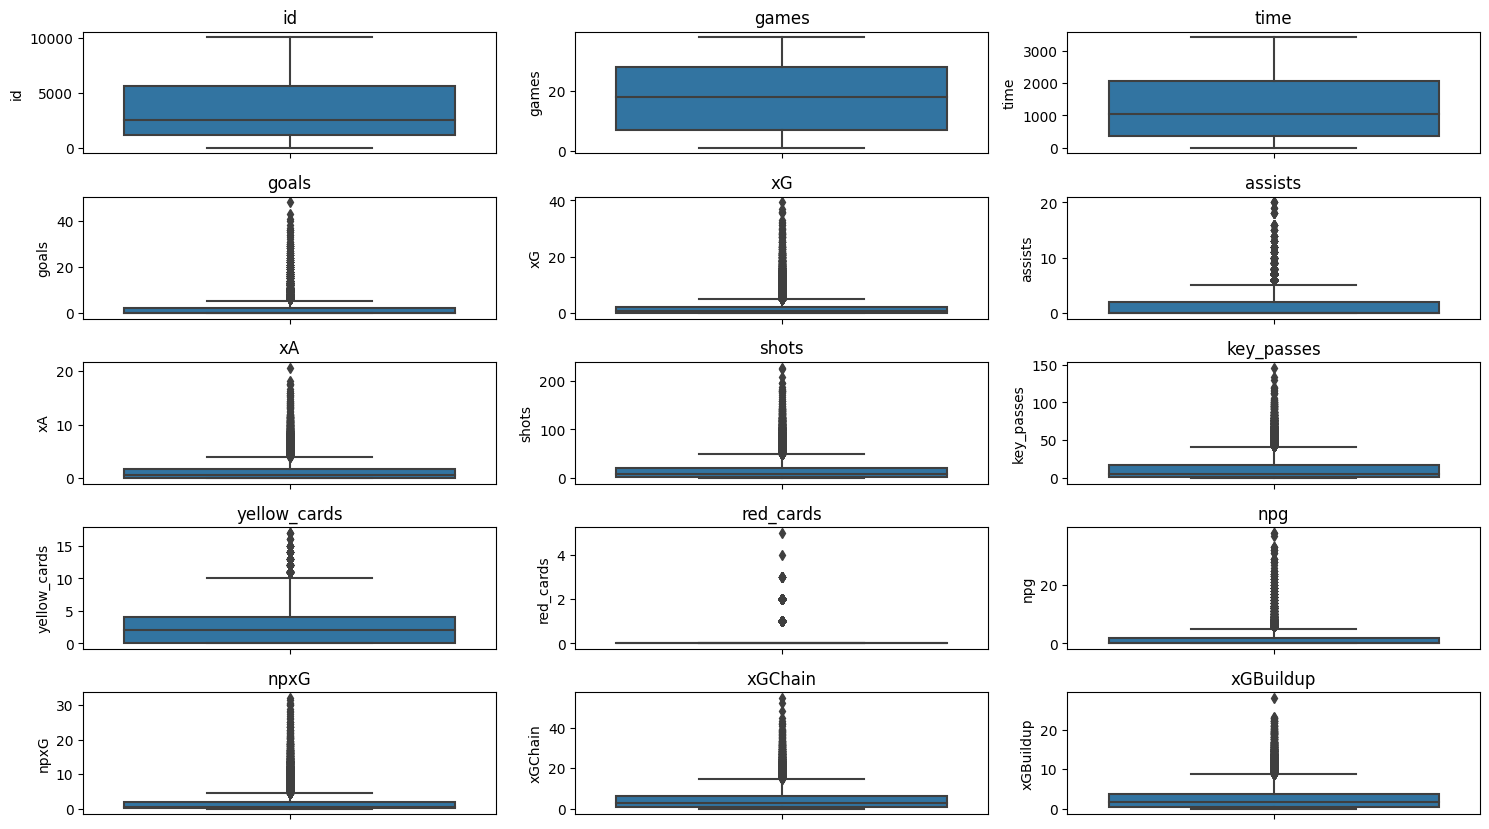

In [25]:
#Outlier detection(Identify extreme values that might need handling.)
# Boxplots for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [26]:
logger.info(f"Dataset shape: {df.shape}")
logger.info(f"Missing values:\n{df.isnull().sum()}")
logger.info(f"Duplicate rows: {df.duplicated().sum()}")
logger.info(f"Columns: {df.columns.tolist()}")
